#Gold Layer

In [0]:
from pyspark.sql.functions import avg, sum, round, date_format, count
import matplotlib.pyplot as plt
import pandas as pd

##Chargement des secrets

In [0]:
storage_account_name = dbutils.secrets.get(scope="azure-storage", key="storage-account-name")
storage_account_key = dbutils.secrets.get(scope="azure-storage", key="storage-account-key")

## Chargement des données traitées (silver data)

In [0]:
df_silver = spark.table("silver_bank_transactions")
display(df_silver)

TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,State,DeviceID,IP_Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,transaction_category
TX000414,AC00400,135.03,2023-02-24T17:00:26Z,Debit,San Francisco,California,D000029,74.58.165.67,M097,ATM,23,Student,180,1,1278.0,2024-11-04T08:08:18Z,Regular
TX000474,AC00464,35.84,2023-03-28T17:23:54Z,Credit,Colorado Springs,Colorado,D000422,35.73.67.98,M013,Online,54,Retired,172,1,4795.65,2024-11-04T08:10:57Z,Regular
TX001016,AC00416,285.18,2023-03-08T16:39:14Z,Credit,Sacramento,California,D000515,110.247.153.70,M084,Branch,55,Doctor,150,1,14847.97,2024-11-04T08:09:38Z,Regular
TX001209,AC00267,220.2,2023-09-11T16:25:04Z,Debit,Boston,Massachusetts,D000288,23.255.214.209,M047,Online,28,Student,102,1,1075.15,2024-11-04T08:11:18Z,Regular
TX001552,AC00310,757.15,2023-01-17T16:53:08Z,Debit,Raleigh,North Carolina,D000463,200.13.225.150,M085,Online,53,Engineer,38,1,4702.86,2024-11-04T08:08:06Z,Regular
TX001710,AC00215,180.94,2023-07-24T16:41:18Z,Debit,Raleigh,North Carolina,D000456,45.124.239.44,M028,Branch,75,Retired,57,1,7659.99,2024-11-04T08:10:34Z,Regular
TX000026,AC00041,7.49,2023-10-20T17:53:13Z,Credit,Houston,Texas,D000671,81.248.235.147,M043,Online,65,Retired,276,1,3634.67,2024-11-04T08:09:44Z,Regular
TX000090,AC00437,392.96,2023-11-20T16:28:09Z,Debit,Kansas City,Missouri,D000141,186.54.68.246,M022,Online,24,Student,100,1,791.65,2024-11-04T08:08:38Z,Regular
TX000358,AC00459,374.5,2023-07-24T16:45:31Z,Credit,San Francisco,California,D000045,9.230.41.239,M002,Branch,26,Student,178,1,1671.51,2024-11-04T08:08:37Z,Regular
TX000488,AC00128,710.14,2023-03-08T16:20:43Z,Debit,El Paso,Texas,D000667,83.207.115.164,M059,ATM,26,Student,227,1,465.63,2024-11-04T08:12:20Z,Regular


## Traitements avancées : jointure, regroupement, statistiques, ML, ...

Montant des transactions en fonction de leur type

In [0]:
df_gold = (
    df_silver
    .groupBy("transaction_category")
    .agg(
        round(avg("TransactionAmount"), 2).alias("avg_amount"),
        round(sum("TransactionAmount"), 2).alias("total_amount")
    )
)
df_gold.show()

+--------------------+----------+------------+
|transaction_category|avg_amount|total_amount|
+--------------------+----------+------------+
|          High Value|   1256.85|   113116.16|
|             Regular|    261.95|   634439.41|
+--------------------+----------+------------+



Nombre de transactions au fil du temps

In [0]:
df_transactions_by_day = (
    df_silver
    .groupBy(date_format("TransactionDate", "yyyy-MM-dd").alias("day"))
    .agg(count("*").alias("transaction_count"))
    .orderBy("day")
)

display(df_transactions_by_day)

day,transaction_count
2023-01-02,19
2023-01-03,9
2023-01-04,4
2023-01-05,8
2023-01-06,7
2023-01-09,23
2023-01-10,6
2023-01-11,6
2023-01-12,8
2023-01-13,4


Databricks visualization. Run in Databricks to view.

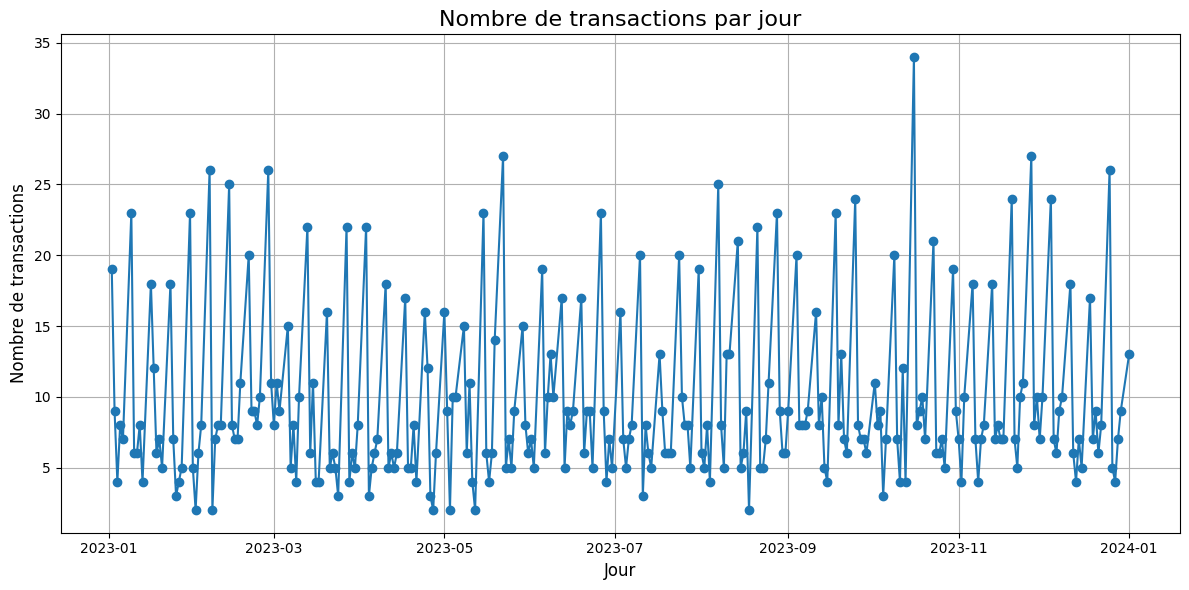

In [0]:
df_transactions_by_day_pd = df_transactions_by_day.toPandas()

df_transactions_by_day_pd["day"] = pd.to_datetime(df_transactions_by_day_pd["day"])

plt.figure(figsize=(12, 6))
plt.plot(
    df_transactions_by_day_pd["day"],
    df_transactions_by_day_pd["transaction_count"],
    marker="o",
    linestyle="-",
)

plt.title("Nombre de transactions par jour", fontsize=16)
plt.xlabel("Jour", fontsize=12)
plt.ylabel("Nombre de transactions", fontsize=12)
plt.grid(True)
plt.tight_layout()

plt.show()

Nombre de transactions et transactions moyennes en fonction de l'etat

In [0]:
df_by_state_and_location = (
    df_silver
    .groupBy("State", "Location")
    .agg(
        count("*").alias("transaction_count"), 
        round(sum("TransactionAmount"), 2).alias("total_amount")
    )
    .orderBy("State", "total_amount", ascending=[True, False])
)

display(df_by_state_and_location)

State,Location,transaction_count,total_amount
Arizona,Tucson,67,20459.76
Arizona,Mesa,61,19163.64
Arizona,Phoenix,55,19064.66
California,San Jose,59,20127.87
California,Los Angeles,69,19675.75
California,San Diego,59,19222.41
California,San Francisco,57,16840.64
California,Fresno,60,13390.95
California,Sacramento,53,12974.5
Colorado,Colorado Springs,60,20344.63


Databricks visualization. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

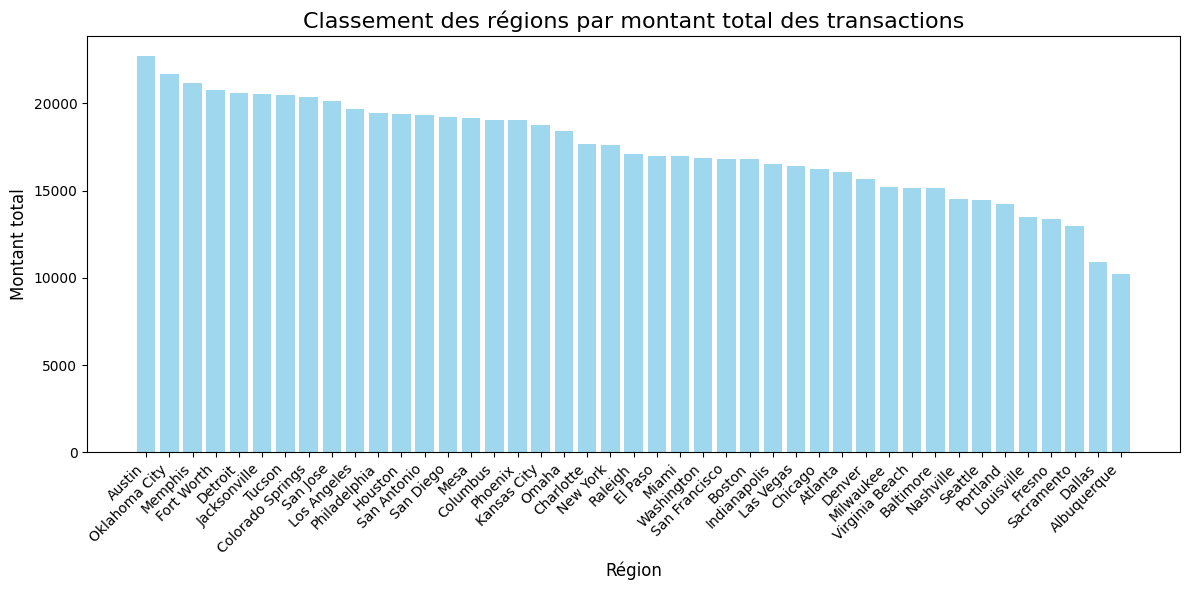

In [0]:
df_by_state_and_location_pd = df_by_state_and_location.toPandas()

df_by_state_and_location_pd = df_by_state_and_location_pd.sort_values(by="total_amount", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(
    df_by_state_and_location_pd["Location"],
    df_by_state_and_location_pd["total_amount"],
    color="skyblue",
    alpha=0.8
)
plt.title("Classement des régions par montant total des transactions", fontsize=16)
plt.xlabel("Région", fontsize=12)
plt.ylabel("Montant total", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

##Sauvegarde des données dans une table gold

In [0]:
df_gold.write.format("delta").mode("overwrite").saveAsTable("gold_bank_transactions_stats")
df_transactions_by_day.write.format("delta").mode("overwrite").saveAsTable("gold_transactions_by_day")
df_by_state_and_location.write.format("delta").mode("overwrite").saveAsTable("gold_state_and_location_transaction_stats")

##Sauvegarde des données dans un conteneur Azure

In [0]:
spark.conf.set(
    f"fs.azure.account.key.{storage_account_name}.blob.core.windows.net",
    storage_account_key
)

In [0]:
df_gold.write.format("delta").mode("overwrite").save(f"wasbs://gold-data@{storage_account_name}.blob.core.windows.net/gold_bank_transactions_stats")
df_transactions_by_day.write.format("delta").mode("overwrite").save(f"wasbs://gold-data@{storage_account_name}.blob.core.windows.net/df_transactions_by_day")
df_by_state_and_location.write.format("delta").mode("overwrite").save(f"wasbs://gold-data@{storage_account_name}.blob.core.windows.net/df_by_state_and_location")